## Assignment | 25th March 2023

# Flight Price:

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

Ans.

In [ ]:
import pandas as pd

df = pd.read_excel('flight_price.xlsx')

df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


- Dimension of Flight_Price Dataset : 10683 X 11
- Rows present in Flight_Price Dataset : 10683 Columns
- Columns present in Flight_Price Dataset : 11 Rows

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

Ans.

<AxesSubplot: ylabel='Count'>

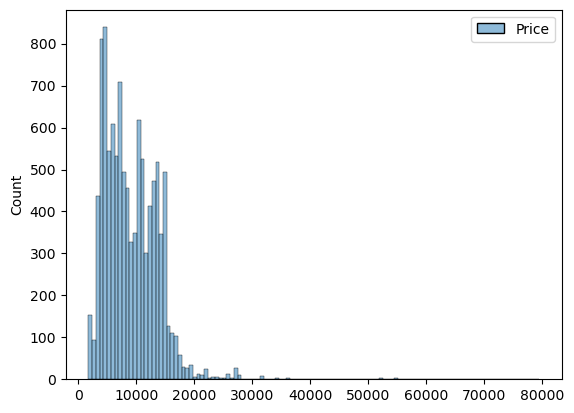

In [ ]:
import seaborn as sns

sns.histplot(df)

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

Ans.


In [ ]:
df = pd.read_excel('flight_price.xlsx')
Price_of_Flight = df['Price']

print(Price_of_Flight)

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64


In [ ]:
# Minimum Price:

min_price = min(Price_of_Flight)
print('Minimum Price of Flight: ', min_price)

Minimum Price of Flight:  1759


In [ ]:
# Maximum Price:

max_price = max(Price_of_Flight)
print('Maximum Price of Flight: ', max_price)

Maximum Price of Flight:  79512


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

Ans. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

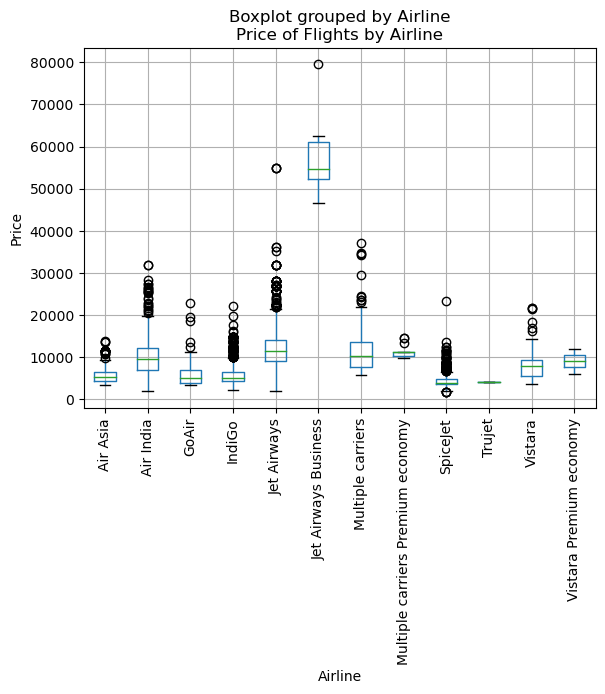

In [ ]:
df = pd.read_excel('flight_price.xlsx')

plt.figure(figsize=(10, 6))
df.boxplot('Price', by = 'Airline', rot = 90)
plt.xlabel('Airline') 
plt.ylabel('Price') 
plt.title('Price of Flights by Airline') 
plt.show()

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

Ans. 

As we can see the graph, there are lot of outliers present.

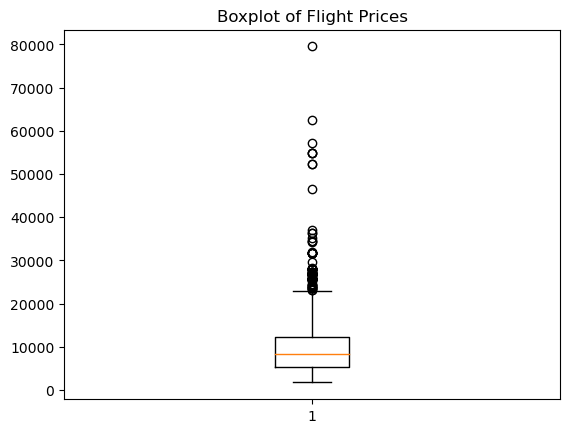

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
my_data = pd.read_excel('flight_price.xlsx')

# Create a boxplot to identify potential outliers
plt.boxplot(my_data['Price'])
plt.title('Boxplot of Flight Prices')
plt.show()

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

Ans.

/tmp/ipykernel_552/2042582173.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  flight_data['Date_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'])


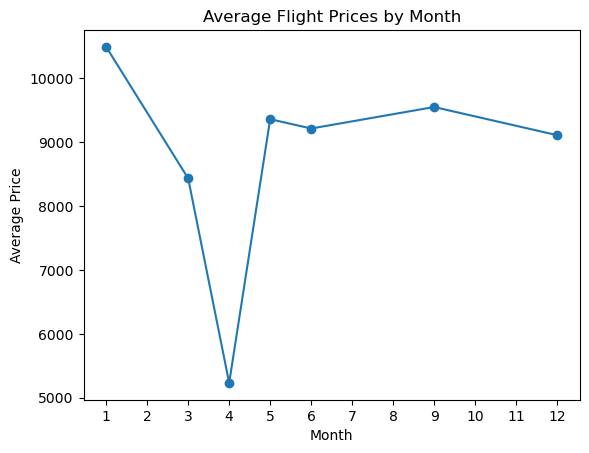

/tmp/ipykernel_552/2042582173.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_dest_monthly_price = dest_monthly_price.pivot('Destination', 'Month', 'Price')


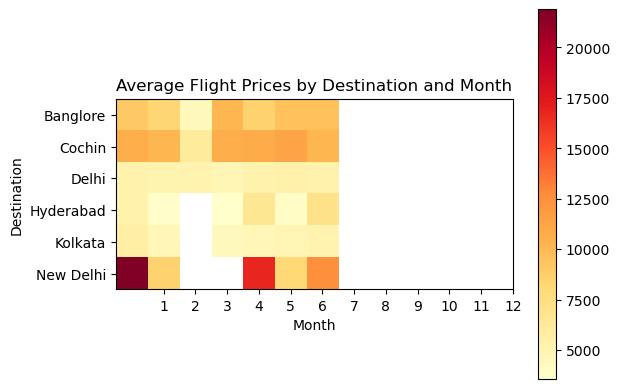

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
flight_data = pd.read_excel('flight_price.xlsx')

# Convert Date of Journey column to datetime format
flight_data['Date_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'])

# Extract month and year from Date of Journey column
flight_data['Month'] = flight_data['Date_of_Journey'].dt.month
flight_data['Year'] = flight_data['Date_of_Journey'].dt.year

# Calculate average flight price by month and year
monthly_price = flight_data.groupby(['Month', 'Year'])['Price'].mean().reset_index()

# Plot line chart of average flight prices by month
plt.plot(monthly_price['Month'], monthly_price['Price'], marker='o')
plt.title('Average Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1,13))
plt.show()

# Calculate average flight price by destination and month
dest_monthly_price = flight_data.groupby(['Destination', 'Month'])['Price'].mean().reset_index()

# Plot heatmap of average flight prices by destination and month
pivot_dest_monthly_price = dest_monthly_price.pivot('Destination', 'Month', 'Price')
plt.imshow(pivot_dest_monthly_price, cmap='YlOrRd')
plt.title('Average Flight Prices by Destination and Month')
plt.xlabel('Month')
plt.ylabel('Destination')
plt.xticks(range(1, 13))
plt.yticks(range(len(pivot_dest_monthly_price.index)), pivot_dest_monthly_price.index)
plt.colorbar()
plt.show()

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

Ans.

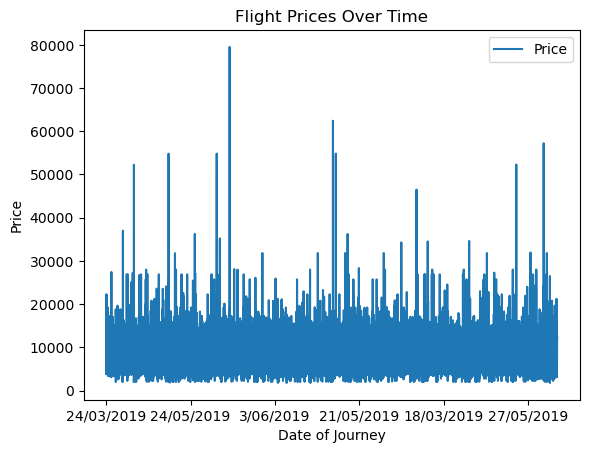

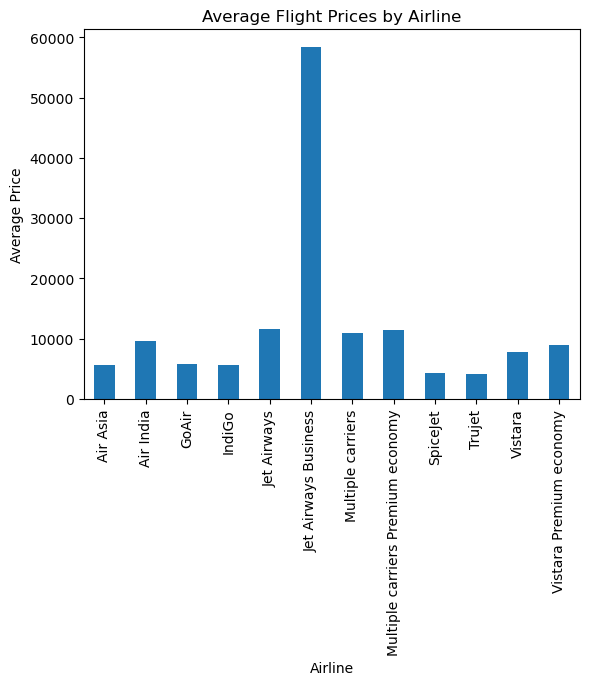

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
flight_data = pd.read_excel('flight_price.xlsx')

# Line chart to show trend in flight prices over time
flight_data.plot(x='Date_of_Journey', y='Price')
plt.xlabel('Date of Journey')
plt.ylabel('Price')
plt.title('Flight Prices Over Time')
plt.show()

# Bar chart to compare average flight prices by airline
flight_data.groupby('Airline')['Price'].mean().plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Airline')
plt.show()


Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

Ans.

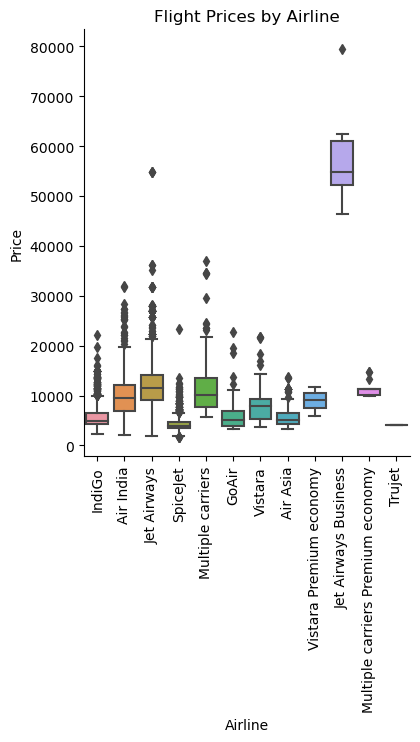

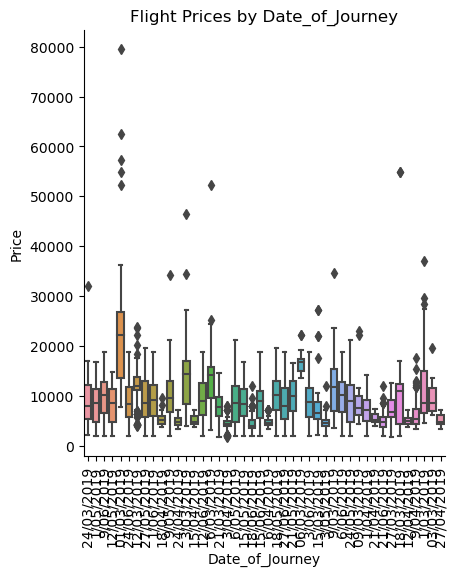

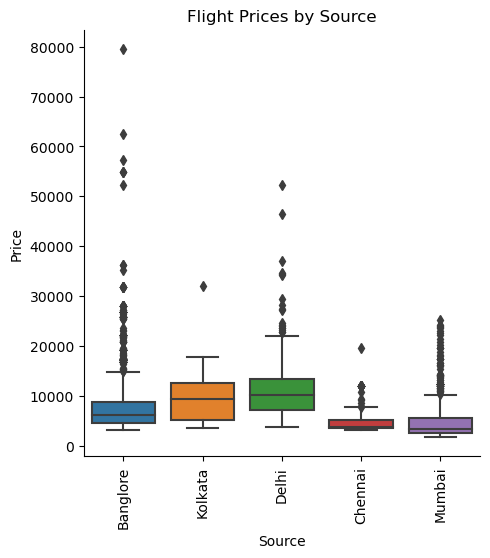

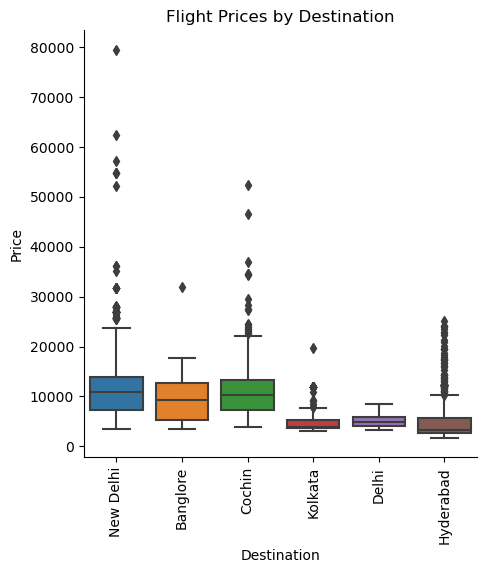

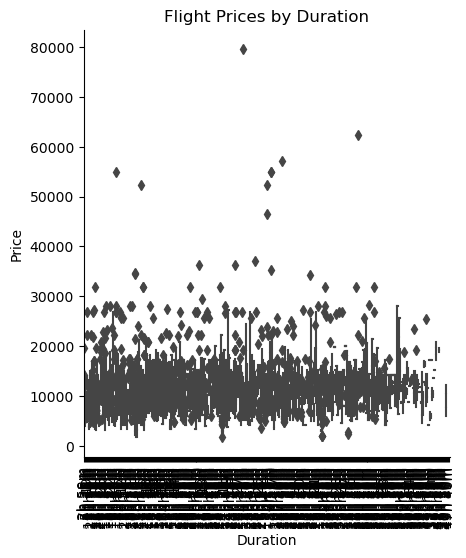

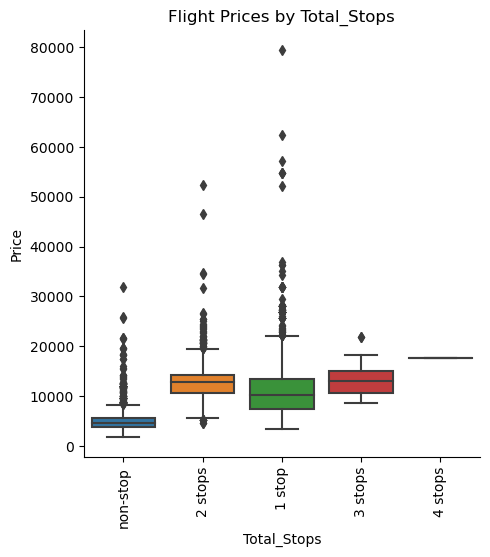

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
flight_data = pd.read_excel('flight_price.xlsx')

# Identify the factors that affect flight prices
factors = ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Duration', 'Total_Stops']

# Visualize the relationships between these factors and flight prices
for factor in factors:
    if factor != 'Price':
        sns.catplot(x=factor, y='Price', data=flight_data, kind='box')
        plt.xticks(rotation=90)
        plt.title('Flight Prices by {}'.format(factor))
        plt.show()

# Google Playstore

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

Ans.

In [ ]:
import pandas as pd

gp = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

gp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


- Dimension of Google Playstore Dataset : 10841 X 13
- Columns of Google Playstore Dataset : 13
- Rows of Google Playstore Dataset : 10841

Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

Ans.

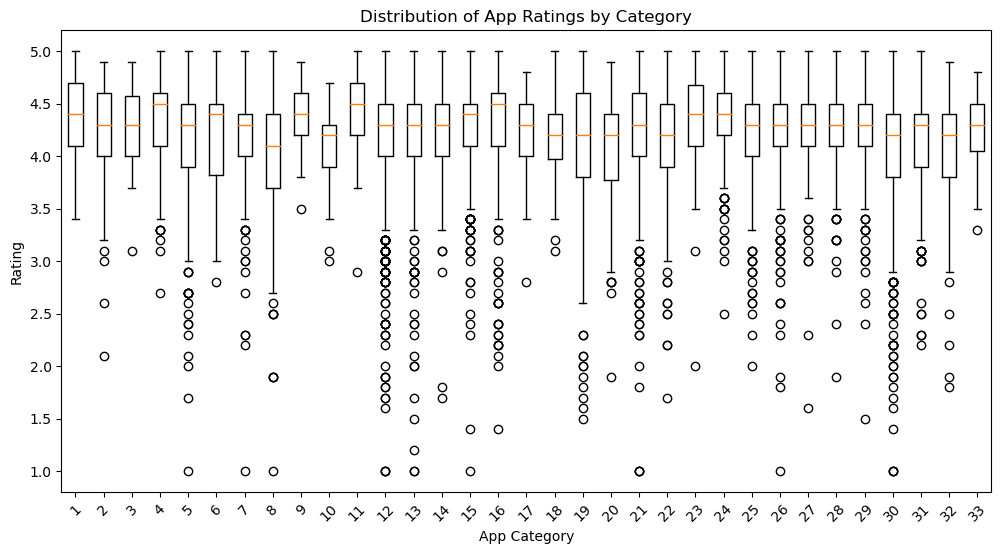

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop Rows with Missing Values:
gp.dropna(inplace = True)

# Group apps by Category & Calculate the Mean Rating:
rating_by_category = gp.groupby('Category')['Rating'].mean()

# Create Boxplot to compare ratings across Categories:
plt.figure(figsize = (12,6))
plt.boxplot(gp.groupby('Category')['Rating'].apply(list).values)
plt.xticks(rotation=45)
plt.title('Distribution of App Ratings by Category')
plt.xlabel('App Category')
plt.ylabel('Rating')
plt.show()

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

Ans.

In [ ]:
# Check for Missing Values:

gp.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### Observation:

- There is no any Missing Value present in Google Playstore Dataset.
- Absence of Missing Values in Google Playstore Dataset doesn't impact your analysis.

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

Ans.

In [ ]:
gp.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


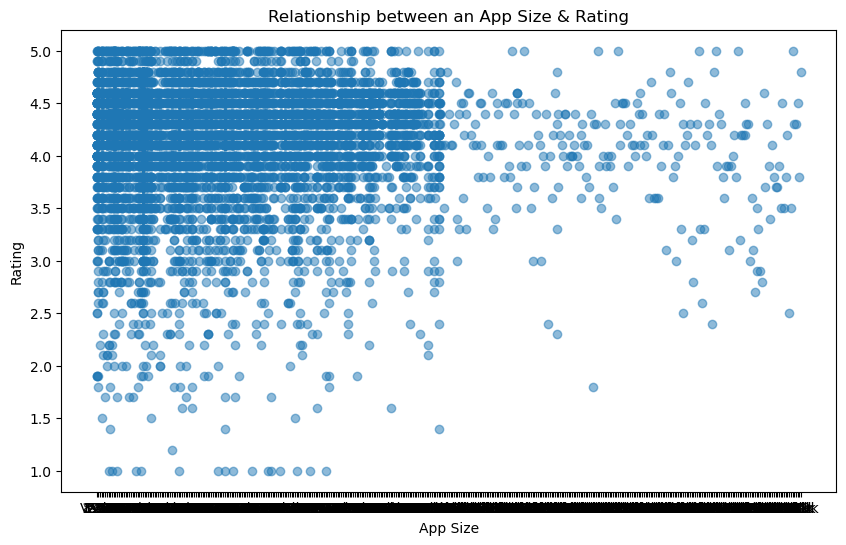

In [ ]:
# Creating Scatter Plot to Show relationship between an App Size & Rating:

plt.figure(figsize = (10,6))
plt.scatter(gp['Size'], gp['Rating'], alpha = 0.5)
plt.title('Relationship between an App Size & Rating')
plt.xlabel('App Size')
plt.ylabel('Rating')
plt.show()

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

Ans.

In [ ]:
gp.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
gp['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
gp['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [ ]:
# Data Cleaning of Price Column:

chars_to_remove=['+',',','$']
cols_to_clean=['Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        gp[cols] = gp[cols].str.replace(item,'')

/tmp/ipykernel_70/441002998.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gp[cols] = gp[cols].str.replace(item,'')


In [ ]:
gp['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [ ]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [ ]:
gp['Price']=gp['Price'].astype('float')

In [ ]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1023.8+ KB


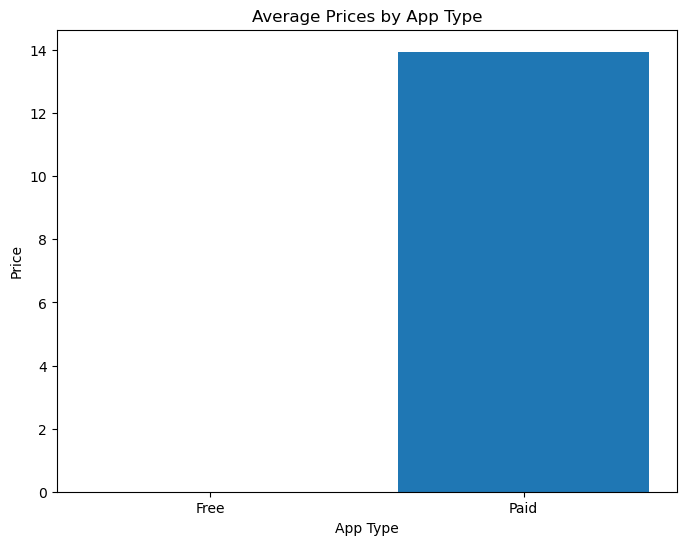

In [ ]:
# group apps by type and calculate the mean price
price_by_type = gp.groupby('Type')['Price'].mean()

# create a bar chart to compare average prices by app type
plt.figure(figsize=(8,6))
plt.bar(price_by_type.index, price_by_type.values)
plt.title('Average Prices by App Type')
plt.xlabel('App Type')
plt.ylabel('Price')
plt.show()

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

Ans.

In [ ]:
# create a frequency table to count the number of installations for each app
install_freq = gp.groupby('App')['Installs'].sum().sort_values(ascending=False)

# sort the table in descending order
install_freq_sorted = install_freq.sort_values(ascending=False)

# select the top 10 most popular apps
top_10_apps = install_freq_sorted.head(10)

# display the results
print(top_10_apps)

App
Candy Crush Saga                 500,000,000+500,000,000+500,000,000+500,000,00...
Temple Run 2                     500,000,000+500,000,000+500,000,000+500,000,00...
Viber Messenger                  500,000,000+500,000,000+500,000,000+500,000,00...
imo free video calls and chat     500,000,000+500,000,000+500,000,000+500,000,000+
Snapchat                          500,000,000+500,000,000+500,000,000+500,000,000+
Pou                               500,000,000+500,000,000+500,000,000+500,000,000+
Flipboard: News For Our Time                  500,000,000+500,000,000+500,000,000+
LINE: Free Calls & Messages                   500,000,000+500,000,000+500,000,000+
Gboard - the Google Keyboard                  500,000,000+500,000,000+500,000,000+
Microsoft Word                                500,000,000+500,000,000+500,000,000+
Name: Installs, dtype: object


Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

Ans.

In [ ]:
# group the dataset by category and calculate the sum of installs for each category
install_freq = gp.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# calculate the average rating for each category
rating_avg = gp.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# calculate the average price for each category
price_avg = gp.groupby('Category')['Price'].mean().sort_values(ascending=False)

# calculate the number of reviews for each category
review_count = gp.groupby('Category')['Reviews'].sum().sort_values(ascending=False)

# combine the features into a single dataframe
summary = pd.concat([install_freq, rating_avg, price_avg, review_count], axis=1)

# rename the columns for readability
summary.columns = ['Total Installs', 'Avg Rating', 'Avg Price', 'Total Reviews']

# sort the summary table by total installs in descending order
summary.sort_values(by='Total Installs', ascending=False, inplace=True)

# display the top 5 most popular app categories based on the summary features
print('Top 5 Most Popular App Categories:')
print(summary.head(5))

Top 5 Most Popular App Categories:
                                                    Total Installs  \
Category                                                             
PRODUCTIVITY     500,000,000+10,000,000+100,000,000+10,000,000+...   
BEAUTY           500,000+1,000,000+100,000+500,000+1,000,000+50...   
FAMILY           50,000,000+10,000,000+100,000,000+1,000,000+5,...   
WEATHER          50,000,000+1,000,000+50,000,000+10,000+10,000,...   
PERSONALIZATION  50,000,000+1,000,000+100,000,000+5,000,000+100...   

                 Avg Rating  Avg Price  \
Category                                 
PRODUCTIVITY       4.211396   0.202051   
BEAUTY             4.278571   0.000000   
FAMILY             4.192383   1.314863   
WEATHER            4.244000   0.392400   
PERSONALIZATION    4.335256   0.404712   

                                                     Total Reviews  
Category                                                            
PRODUCTIVITY     208412653692630162971188

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

Ans.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

gp = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# group the dataset by developer and calculate the total number of apps, installs, and average rating
dev_summary = gp.groupby('Category').agg({'App': 'count', 'Installs': 'sum', 'Rating': 'mean'}).reset_index()

# sort the summary data by the total number of installs in descending order
dev_summary = dev_summary.sort_values('Installs', ascending=False).reset_index(drop=True)

# create a bar chart to visualize the total number of apps developed and the total number of installs for each developer
plt.bar(dev_summary['Category'], dev_summary['Installs'])
plt.title('Total Installs by Developer')
plt.xlabel('Developer')
plt.ylabel('Total Installs')
plt.xticks(rotation=90)
plt.show()

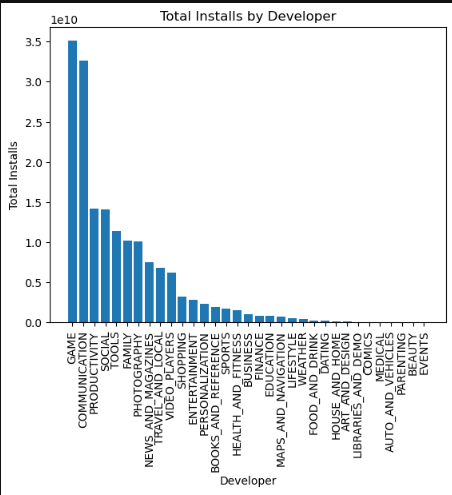

Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

Ans.

In [ ]:
gp['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
# Data Cleaning of Installs Column:

chars_to_remove=['+',',','$']
cols_to_clean=['Installs']
for item in chars_to_remove:
    for cols in cols_to_clean:
        gp[cols]=gp[cols].str.replace(item,'')

/tmp/ipykernel_70/2614139615.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gp[cols]=gp[cols].str.replace(item,'')


In [ ]:
gp['Installs']=gp['Installs'].astype('int')

In [ ]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 9360 non-null   object 
 1   Category            9360 non-null   object 
 2   Rating              9360 non-null   float64
 3   Reviews             9360 non-null   object 
 4   Size                9360 non-null   object 
 5   Installs            9360 non-null   int64  
 6   Type                9360 non-null   object 
 7   Price               9360 non-null   float64
 8   Content Rating      9360 non-null   object 
 9   Genres              9360 non-null   object 
 10  Last Updated        9360 non-null   object 
 11  Current Ver         9360 non-null   object 
 12  Android Ver         9360 non-null   object 
 13  Last Updated Month  9360 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 1.1+ MB


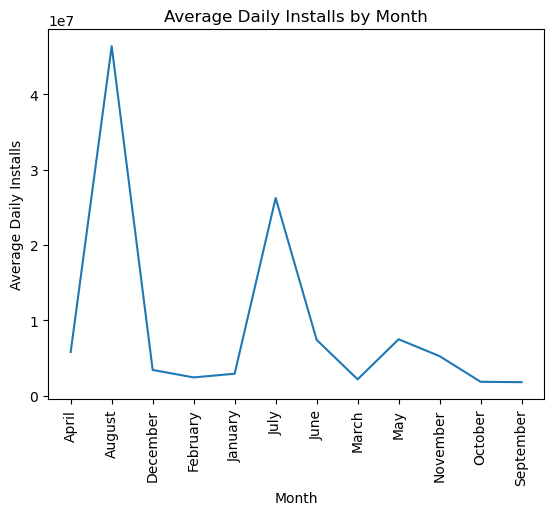

In [ ]:
# extract the month from the 'Last Updated' column
gp['Last Updated Month'] = pd.to_datetime(gp['Last Updated']).dt.strftime('%B')

# group the dataset by month and calculate the average number of installs
month_summary = gp.groupby('Last Updated Month')['Installs'].mean()

# create a line chart to visualize the average daily installs by month
plt.plot(month_summary.index, month_summary.values)
plt.xticks(rotation=90)
plt.title('Average Daily Installs by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Installs')
plt.show()